In [1]:
from clusc import *

In [2]:
hic_file_path = "data/hic/Rao2014-K562-MboI-allreps-filtered.1kb.cool"
hic_data = parse_cooler(hic_file_path)

bed_file_path = "data/tf/K562.CTCF.sorted.bed"
tf_data = parse_bed(bed_file_path)

tf_selected = []
for item in tf_data:
    if item[0] == "chr1":
        tf_selected.append(item)
#tf_selected = tf_selected[600:650]

In [3]:
len(tf_selected)

5828

In [5]:
feat_file_path = "data/features/wgEncodeRegTfbsClusteredWithCellsV3_K562.bed"
cat_file_path = "data/features/Tf_K562"
feat_outfile_path = "data/features/K562.CTCF.chr1_tf.txt"
feat_mat = bed_annotate_cat(tf_selected, feat_file_path, cat_file_path, feat_outfile_path)

In [ ]:
feat_file_path = "data/features/E123_25_imputed12marks_mnemonics.bed"
cat_file_path = "data/features/ChromHMM_25"
feat_outfile_path = "data/features/K562.CTCF.chr1_ChromHMM.txt"
feat_mat = bed_annotate_cat(tf_selected, feat_file_path, cat_file_path, feat_outfile_path)

In [6]:
feas = format_data(hic_data, tf_selected[600:650], feat_mat[600:650])

/home/archer/Desktop/ClusC/clusc/utils.py:159: RuntimeWarning: divide by zero encountered in power
  degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5).flatten())


In [10]:
feas

{'adj': <50x50 sparse matrix of type '<class 'numpy.float64'>'
 	with 727 stored elements in COOrdinate format>,
 'num_features': 100,
 'num_nodes': 50,
 'features_nonzero': 652,
 'pos_weight': 2.602305475504323,
 'norm': 0.6921373200442967,
 'adj_norm': (array([[ 0,  0],
         [ 1,  0],
         [ 3,  0],
         ...,
         [44, 49],
         [45, 49],
         [49, 49]], dtype=int32),
  array([0.05742647, 0.0687557 , 0.05105582, 0.13842181, 0.05182372,
         0.0505652 , 0.08586557, 0.03330766, 0.05030004, 0.03361363,
         0.05815338, 0.07085501, 0.05957105, 0.04219485, 0.04736267,
         0.0687557 , 0.08227615, 0.06083142, 0.10175094, 0.04866833,
         0.04734911, 0.05736144, 0.06015876, 0.03268088, 0.03327895,
         0.06786234, 0.0740934 , 0.06083142, 0.04454463, 0.09420939,
         0.16947271, 0.05167044, 0.09189103, 0.07577259, 0.0445935 ,
         0.05747629, 0.03008207, 0.03523844, 0.02489916, 0.04437652,
         0.0411124 , 0.05054149, 0.03025801, 0.0424

In [7]:
tf.reset_default_graph()
placeholders = get_placeholder(feas['adj'])
d_real, discriminator, ae_model = get_model('arga_vae', placeholders, feas['num_features'], feas['num_nodes'], feas['features_nonzero'])
opt = get_optimizer('arga_vae', ae_model, discriminator, placeholders, feas['pos_weight'], feas['norm'], d_real, feas['num_nodes'])
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(100):
    emb, avg_cost = update(ae_model, opt, sess, feas['adj_norm'], feas['adj_label'], feas['features'], placeholders, feas['adj'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [17]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(emb)
predict_labels = kmeans.predict(emb)
predict_labels

array([1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 3, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 0, 0, 1], dtype=int32)

In [12]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(emb)
predict_labels = kmeans.predict(emb)
predict_labels

array([0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 4, 1, 0, 5, 1, 1, 5,
       3, 5, 0, 0, 3, 5], dtype=int32)

In [24]:
feas['adj'].toarray()

array([[0.53490451, 0.56011681, 0.        , 0.4791292 , 0.99595877,
        0.        , 0.        , 0.        , 0.        , 0.52763902],
       [0.56011681, 0.58620512, 0.70259514, 0.83512517, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.70259514, 0.83401531, 1.25345524, 1.72879652,
        0.62963838, 0.        , 1.21893216, 0.97063633, 0.        ],
       [0.4791292 , 0.83512517, 1.25345524, 0.42799494, 0.90976915,
        0.44569879, 0.        , 0.        , 0.        , 0.        ],
       [0.99595877, 0.        , 1.72879652, 0.90976915, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.62963838, 0.44569879, 0.        ,
        0.        , 0.        , 1.22585881, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.2189321

In [43]:
emb

array([[ 0.1404201 , -0.00407372, -0.10917312, ...,  0.02225803,
         0.05357814,  0.00747988],
       [ 0.16328076, -0.01540847, -0.12226482, ...,  0.00259516,
         0.04207673, -0.00276063],
       [ 0.2771528 , -0.02635104, -0.23355493, ...,  0.01453462,
         0.080526  ,  0.01255154],
       ...,
       [ 0.06791949,  0.00767175, -0.03737514, ...,  0.0311738 ,
         0.00321163,  0.01353684],
       [ 0.04149578,  0.03100486, -0.01982669, ...,  0.03479105,
         0.0343438 ,  0.00698431],
       [ 0.02278349,  0.02142106,  0.00901946, ...,  0.01481017,
         0.03793152, -0.00732292]], dtype=float32)

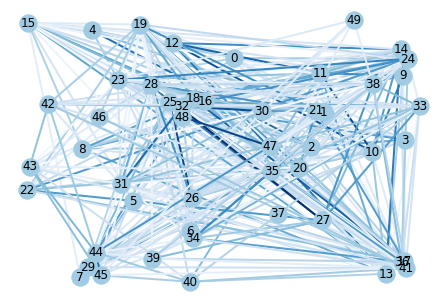

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

H = nx.from_scipy_sparse_matrix(feas['adj'])
pos = nx.random_layout(H)
#pos = nx.spring_layout(H)
colors = feas['edges_weight']
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 2,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
}
nx.draw(H, pos, **options)
#plt.figure(figsize=(12,12))
plt.show()

In [15]:
len(feas['edges_weight'])

12

In [14]:
H.number_of_edges()

12

In [104]:
feas['adj'] = adj
feas['adj_orig'] = adj_orig
feas['num_features'] = num_features
feas['num_nodes'] = num_nodes

In [105]:
feas

{'num_features': 700,
 'features_nonzero': 700,
 'pos_weight': -0.872869052708032,
 'norm': -0.07282360790404402,
 'adj_norm': (array([[  0,   0],
         [  1,   0],
         [  2,   0],
         ...,
         [697, 699],
         [698, 699],
         [699, 699]], dtype=int32),
  array([0.00218594, 0.00218594, 0.00218594, ..., 0.00222475, 0.00222475,
         0.00222475]),
  (700, 700)),
 'adj_label': (array([[  0,   0],
         [  0,   1],
         [  0,   2],
         ...,
         [699, 697],
         [699, 698],
         [699, 699]], dtype=int32),
  array([11.78262214, 11.78262214, 11.78262214, ..., 11.61152837,
         11.61152837, 11.61152837]),
  (700, 700)),
 'features': (array([[  0,   0],
         [  1,   1],
         [  2,   2],
         ...,
         [697, 697],
         [698, 698],
         [699, 699]], dtype=int32),
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,


In [106]:
placeholders = get_placeholder(feas['adj'])
d_real, discriminator, ae_model = get_model('arga_ae', placeholders, feas['num_features'], feas['num_nodes'], feas['features_nonzero'])
opt = get_optimizer('arga_ae', ae_model, discriminator, placeholders, feas['pos_weight'], feas['norm'], d_real, feas['num_nodes'])
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(50):
    emb, avg_cost = update(ae_model, opt, sess, feas['adj_norm'], feas['adj_label'], feas['features'], placeholders, feas['adj'])
kmeans = KMeans(n_clusters=5, random_state=0).fit(emb)
predict_labels = kmeans.predict(emb)


In [111]:
d_real, discriminator, ae_model = get_model('arga_ae', placeholders, feas['num_features'], feas['num_nodes'], feas['features_nonzero'])

In [113]:
ae_model

In [114]:
opt = get_optimizer('arga_ae', ae_model, discriminator, placeholders, feas['pos_weight'], feas['norm'], d_real, feas['num_nodes'])

ValueError: Variable Discriminator/dc_den1/weights/adam1/ already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/home/archer/Desktop/ClusC/clusc/arga.py", line 351, in __init__
    beta1=0.9, name='adam1').minimize(self.dc_loss, var_list=dc_var) #minimize(dc_loss_real, var_list=dc_var)
  File "/home/archer/Desktop/ClusC/clusc/utils.py", line 238, in get_optimizer
    norm=norm,
  File "<ipython-input-68-2f598d157b30>", line 1, in <module>
    opt = get_optimizer('arga_ae', ae_model, discriminator, placeholders, feas['pos_weight'], feas['norm'], d_real, feas['num_nodes'])


In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for epoch in range(50):
    emb, avg_cost = update(ae_model, opt, sess, feas['adj_norm'], feas['adj_label'], feas['features'], placeholders, feas['adj'])

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(emb)

In [ ]:
predict_labels = kmeans.predict(emb)

In [ ]:
predict_labels

In [82]:
adj.toarray()[0]

array([11.50006297, 11.50006297, 11.50006297, 11.50006297, 11.50006297,
       11.50006297, 11.50006297, 11.50006297, 11.50006297, 11.50006297,
       11.50006297, 11.50006297, 11.50006297,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        8.94947973,  8.94947973,  8.94947973,  8.94947973,  8.94947973,
        8.94947973,  8.94947973,  8.94947973,  8.94947973,  8.94947973,
        8.94947973,  8.94947973,  8.94947973,  8.94947973,  8.94947973,
        8.94947973,  8.94947973,  8.94947973,  8.94947973,  8.94947973,
        8.94947973,  8.94947973,  8.94947973,  8.94947973,  8.94947973,
        8.94947973,  8.94947973,  8.94947973,  8.94947973,  8.94947973])

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.from_scipy_sparse_matrix(adj_norm)
pos = nx.spring_layout(G)
pos = nx.random_layout(G)
colors = edges_weight
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 1,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
}
nx.draw(G, pos, **options)
#plt.figure(figsize=(12,12))
plt.show()

AttributeError: 'tuple' object has no attribute 'shape'

In [2]:

Clustering_Runner()

TypeError: __init__() missing 1 required positional argument: 'settings'

In [33]:
C[1][2]

{'weight': nan}

In [11]:
chrom, start, end = inFile.readline().strip().split("\t")

ValueError: too many values to unpack (expected 3)

In [12]:
arr = hic_data.matrix(balance=True, sparse=True).fetch(("chr1", 7000000, 8000000), ("chr2", 5000000, 6000000))
arr.toarray()[0][0]

25.046191167391537

In [10]:
arr1 = hic_data.matrix(balance=True, sparse=True).fetch(("chr1", 0, 10000000), ("chr3", 0, 10000000))
arr1.toarray().squeeze()

array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan],
       [ 28.84407587,  25.56342229,  23.90924643,  21.18729689,
         47.82239859,  31.53106998,  17.08129819,  28.89981136,
         21.87422981,  87.59375369],
       [ 22.08855301,  31.43716377,  39.20387431,  35.60383012,
         48.00866499,  50.77810283,  25.88985976,  24.73490946,
         47.93294736,  87.00734435],
       [ 33.84974063,  29.24976129,  41.68692911,  40.15334592,
         83.92210094,  60.84577534,  39.41744647,  33.91514858,
         46.90454683, 108.13919057],
       [ 55.2977132 ,  82.29308459,  72.00232815,  75.57139873,
         70.94404844,  60.02923327,  93.90681597, 100.42077427,
         87.92957533,  79.44705265],
       [ 64.92538198,  76.0710603 ,  97.23642106,  68.53117847,
         57.29316296,  61.2497817 ,  82.72356951,  85.99941225,
         87.49038147,  68.73932834],
       [ 2

In [3]:
hic_data.bins()[:]["chrom"].value_counts(sort=False)

chr1     250
chr2     244
chr3     199
chr4     192
chr5     181
chr6     172
chr7     160
chr8     147
chr9     142
chr10    136
chr11    136
chr12    134
chr13    116
chr14    108
chr15    103
chr16     91
chr17     82
chr18     79
chr19     60
chr20     64
chr21     49
chr22     52
chrX     156
chrY      60
chrM       1
Name: chrom, dtype: int64

In [28]:
from clusc.utils import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_heatmap(fig, ax, hic_data, region=None, site_list=None, cmap="Reds"):
    if region == None:
        arr = hic_data.matrix(balance=True, sparse=True)[:].toarray()
    else:
        chrom, start, end = region
    im = ax.matshow(np.log1p(arr), cmap=cmap)
    divider = make_axes_locatable(im)
    cax1 = divider.append_axes("right", size="2.5%", pad=0.09)
    fig.colorbar(im, cax=cax1)

### Overview the Hi-C data

Create a heatmap of the whole Hi-C matrix, or each chromosome, or certain region.

AttributeError: 'AxesImage' object has no attribute 'set_axes_locator'

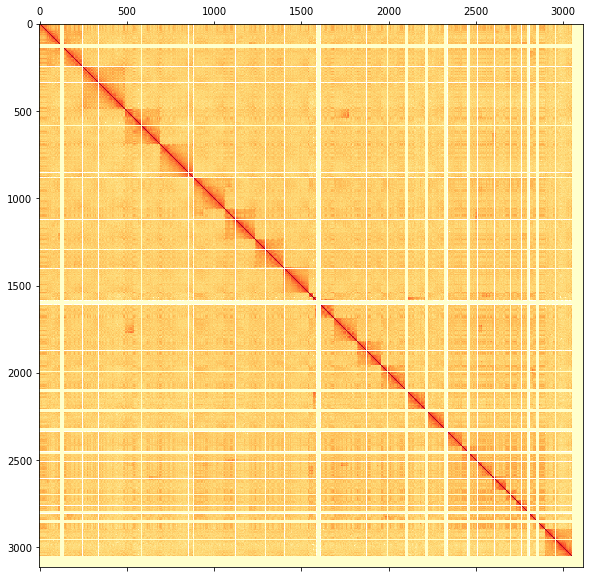

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
#im = ax.matshow(np.log10(arr), cmap='YlOrRd')
#fig.colorbar(im)

plot_heatmap(fig, ax, hic_data, cmap='YlOrRd')

In [ ]:
plot_heatmap(hic_data, "chr1")

In [ ]:
plot_heatmap(hic_data, "chr1", [129999,333333])

Plot the interactions of Hi-C subnet, ignoring others.

In [ ]:
plot_heatmap(hic_data, "chr1", [129999,333333], region_list)

Create pyGenomeTracks of certain ragion.

In [13]:
df.loc[(df["chrom"] == "chr1") & (df["start"] <= 12200) & (df["end"] >= 12200)].index.tolist()

[12]

In [8]:
(hic_data.bins()[:]["chrom"] == "chr1") & (hic_data.bins()[:]["start"] <= 12200) & (hic_data.bins()[:]["end"] >= 12200).index

0          False
1           True
2          False
3           True
4          False
           ...  
3095701    False
3095702    False
3095703    False
3095704    False
3095705    False
Length: 3095706, dtype: bool

In [53]:
bins = hic_data.bins()[:]  # fetch all the bins

pix = hic_data.pixels()[100:110]  # select some pixels with unannotated bins
pix

,bin1_id,bin2_id,count
100,54,641895,1
101,54,1097983,1
102,54,1106188,1
103,54,1236006,1
104,54,1236769,1
105,54,1389899,1
106,54,1643781,1
107,54,1935324,1
108,54,1961795,1
109,54,2137782,1


In [58]:
cooler.annotate(pix, bins[['weight']])

,weight1,weight2,bin1_id,bin2_id,count
100,NaN,0.955142,54,641895,1
101,NaN,0.632245,54,1097983,1
102,NaN,0.658753,54,1106188,1
103,NaN,1.003764,54,1236006,1
104,NaN,0.667501,54,1236769,1
105,NaN,0.919056,54,1389899,1
106,NaN,0.542438,54,1643781,1
107,NaN,0.708884,54,1935324,1
108,NaN,1.475098,54,1961795,1
109,NaN,1.258916,54,2137782,1


In [61]:
cooler.annotate(pix, bins[['weight']], replace=True)

,weight1,weight2,count
100,NaN,0.955142,1
101,NaN,0.632245,1
102,NaN,0.658753,1
103,NaN,1.003764,1
104,NaN,0.667501,1
105,NaN,0.919056,1
106,NaN,0.542438,1
107,NaN,0.708884,1
108,NaN,1.475098,1
109,NaN,1.258916,1


Use the `join=True` option if you would like to expand the bin IDs into genomic bin coordinates by joining the output with the bin table.

In [25]:
c.pixels(join=True)[:10]

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr1,10000,15000,chr1,1170000,1175000,1
1,chr1,10000,15000,chr1,9970000,9975000,1
2,chr1,10000,15000,chr1,16290000,16295000,1
3,chr1,10000,15000,chr1,20435000,20440000,1
4,chr1,10000,15000,chr1,30465000,30470000,1
5,chr1,10000,15000,chr1,186795000,186800000,1
6,chr1,10000,15000,chr1,249130000,249135000,1
7,chr1,10000,15000,chr2,190000,195000,1
8,chr1,10000,15000,chr2,43000000,43005000,1
9,chr1,10000,15000,chr2,54875000,54880000,1


Pandas lets you readily dump any table selection to tabular text file.

In [26]:
df = c.pixels(join=True)[:100]

# tab-delimited file, don't write the index column or header row
df.to_csv('myselection.txt', sep='\t', index=False, header=False)

In [27]:
!head myselection.txt

chr1	10000	15000	chr1	1170000	1175000	1
chr1	10000	15000	chr1	9970000	9975000	1
chr1	10000	15000	chr1	16290000	16295000	1
chr1	10000	15000	chr1	20435000	20440000	1
chr1	10000	15000	chr1	30465000	30470000	1
chr1	10000	15000	chr1	186795000	186800000	1
chr1	10000	15000	chr1	249130000	249135000	1
chr1	10000	15000	chr2	190000	195000	1
chr1	10000	15000	chr2	43000000	43005000	1
chr1	10000	15000	chr2	54875000	54880000	1


### Bin annotation

Another way to annotate the bins in a data frame of pixels is to use `cooler.annotate`. It does a [left outer join](http://chris.friedline.net/2015-12-15-rutgers/lessons/python2/04-merging-data.html) from the `bin1_id` and `bin2_id` columns onto a data frame indexed by bin ID that describes the bins.

In [28]:
bins = c.bins()[:]  # fetch all the bins

pix = c.pixels()[100:110]  # select some pixels with unannotated bins
pix

,bin1_id,bin2_id,count
100,2,356649,1
101,2,356700,1
102,2,363068,1
103,2,363243,1
104,2,363270,1
105,2,363293,1
106,2,363329,1
107,2,363348,1
108,2,363373,1
109,2,363374,1


In [29]:
cooler.annotate(pix, bins)

,chrom1,start1,end1,weight1,chrom2,start2,end2,weight2,bin1_id,bin2_id,count
100,chr1,10000,15000,NaN,chr10,102850000,102855000,1.503567,2,356649,1
101,chr1,10000,15000,NaN,chr10,103105000,103110000,0.924921,2,356700,1
102,chr1,10000,15000,NaN,chr10,134945000,134950000,1.480836,2,363068,1
103,chr1,10000,15000,NaN,chr11,285000,290000,1.455694,2,363243,1
104,chr1,10000,15000,NaN,chr11,420000,425000,1.107395,2,363270,1
105,chr1,10000,15000,NaN,chr11,535000,540000,0.819330,2,363293,1
106,chr1,10000,15000,NaN,chr11,715000,720000,0.911051,2,363329,1
107,chr1,10000,15000,NaN,chr11,810000,815000,1.202326,2,363348,1
108,chr1,10000,15000,NaN,chr11,935000,940000,0.889250,2,363373,1
109,chr1,10000,15000,NaN,chr11,940000,945000,1.017561,2,363374,1


In [30]:
cooler.annotate(pix, bins[['weight']], replace=False)

,weight1,weight2,bin1_id,bin2_id,count
100,NaN,1.503567,2,356649,1
101,NaN,0.924921,2,356700,1
102,NaN,1.480836,2,363068,1
103,NaN,1.455694,2,363243,1
104,NaN,1.107395,2,363270,1
105,NaN,0.819330,2,363293,1
106,NaN,0.911051,2,363329,1
107,NaN,1.202326,2,363348,1
108,NaN,0.889250,2,363373,1
109,NaN,1.017561,2,363374,1


### Enter The Matrix

Finally, the `matrix` method provides a 2D-sliceable view on the data. It allows you to query the data on file as a full rectangular contact matrix.

In [31]:
c.matrix()

The result of a query is a 2D NumPy array.

In [32]:
arr = c.matrix(balance=False)[1000:1200, 1000:1200]
arr

array([[129, 230,  72, ...,   3,   3,   3],
       [230, 217, 128, ...,   3,   6,   1],
       [ 72, 128,  42, ...,   3,   1,   1],
       ...,
       [  3,   3,   3, ..., 199, 357, 165],
       [  3,   6,   1, ..., 357, 225, 257],
       [  3,   1,   1, ..., 165, 257, 136]])

Use **`sparse=True`** to return `scipy.sparse.coo_matrix` objects instead.

In [33]:
mat = c.matrix(balance=False, sparse=True)[1000:1200, 1000:1200]
mat

<200x200 sparse matrix of type '<class 'numpy.int64'>'
	with 39393 stored elements in COOrdinate format>

It is straightforward to convert to a dense 2D numpy array.

In [34]:
arr = mat.toarray()
arr

array([[129, 230,  72, ...,   3,   3,   3],
       [230, 217, 128, ...,   3,   6,   1],
       [ 72, 128,  42, ...,   3,   1,   1],
       ...,
       [  3,   3,   3, ..., 199, 357, 165],
       [  3,   6,   1, ..., 357, 225, 257],
       [  3,   1,   1, ..., 165, 257, 136]])

Notice that the lower triangle has been automatically filled in.

/home/nezar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


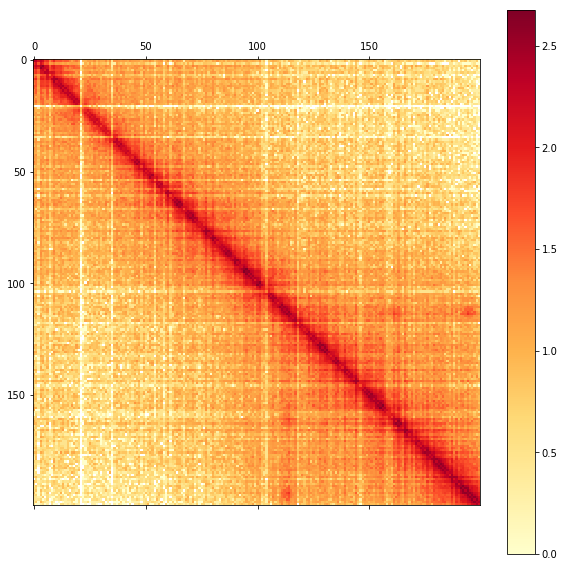

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr), cmap='YlOrRd')
fig.colorbar(im)

Notice the light and dark "banded" appearance? That's because you are looking at the unnormalized counts.

### Balancing your selection

We usually normalize or "correct" Hi-C using a technique called matrix balancing. This involves finding a set of weights or biases $b_i$ for each bin $i$ such that

$$ Normalized[i,j] = Observed[i,j] \cdot b[i] \cdot b[j], $$

such that the marginals (i.e., row/column sums) of the global contact matrix are flat and equal.

Cooler can store the pre-computed balancing weights in the bin table.

Here's one way to manually apply them to balance your selection.

In [36]:
# get the balancing weights as a numpy array
weights = c.bins()['weight']  # view
bias = weights[1000:1200]     # series
bias = bias.values            # array

# fetch a sparse matrix
mat = c.matrix(balance=False, sparse=True)[1000:1200, 1000:1200]

# apply the balancing weights
mat.data = bias[mat.row] * bias[mat.col] * mat.data

# convert to dense numpy array
arr = mat.toarray()

As a shortcut, we get the same result by passing **`balance=True`** to the matrix view constructor.

In [37]:
arr2 = c.matrix(balance=True, sparse=True)[1000:1200, 1000:1200].toarray()
np.allclose(arr, arr2, equal_nan=True)

True

/home/nezar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


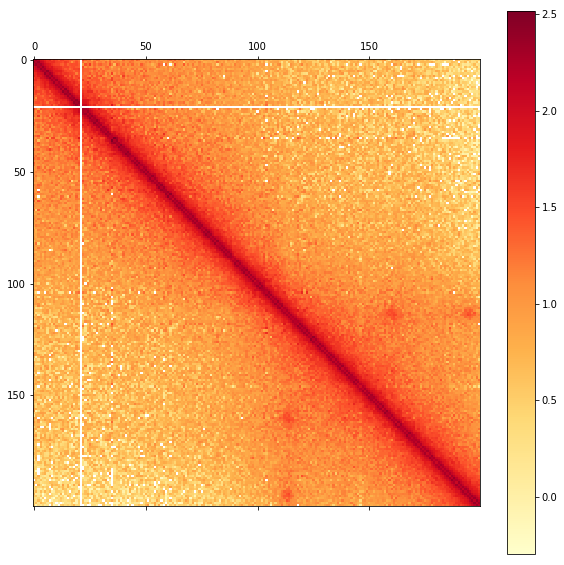

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr), cmap='YlOrRd')
fig.colorbar(im)

### Genomic coordinate range selection

The bin table, pixel table and matrix views also accept UCSC-style genomic range strings or (chrom, start, end) triples.

In [39]:
c.bins().fetch('chr2:10,000,000-20,000,000')

,chrom,start,end,weight
51851,chr2,10000000,10005000,2.474065
51852,chr2,10005000,10010000,1.403127
51853,chr2,10010000,10015000,0.883045
51854,chr2,10015000,10020000,0.771122
51855,chr2,10020000,10025000,0.924510
51856,chr2,10025000,10030000,0.866517
51857,chr2,10030000,10035000,1.014915
51858,chr2,10035000,10040000,1.052058
51859,chr2,10040000,10045000,1.311514
51860,chr2,10045000,10050000,0.965850


In [40]:
cis = c.matrix(sparse=True).fetch('chr21')
cis.shape

(9626, 9626)

In [41]:
trans = c.matrix(sparse=True).fetch('chr21', 'chr22')
trans.shape

(9626, 10261)

In [3]:
import matplotlib.pyplot as plt
from pygenometracks.tracks import BedTrack

Number of fields in BED file is not standard.Assuming bed6


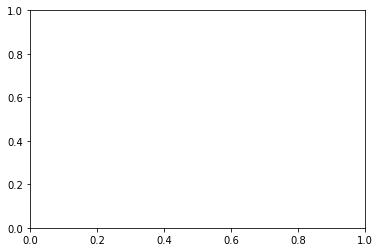

In [24]:


# make a properties dict using as keys the values from the 
# documentation
properties_dict = {'file': "data/tf/K562.CTCF.sorted.bed", 'height': 3, 'title':'bed', 'color':'red'}

# initialize a bigwig track with the properties_dict. Any of the available tracks can be
# initialized in the same way
bw = BedTrack(properties_dict)

# to plot the region two axes are needed, one for the plot itself and the other for the legend.
figure, axes = plt.subplots(1, 1)



In [28]:
axes[1,0]

TypeError: 'AxesSubplot' object is not subscriptable

In [22]:
# the plot method of all track classes expects 5 values, the track_ax, 
# the label_ax, and the genomic region to plot (chrom, start, end).
bw.plot(axes, "chr1", 100000, 105000)

KeyError: 'section_name'

In [11]:
np.zeros((3, 2))[2][1]

0.0